# Tweet Sentiment Classification

- NLP Project, Bi-directional LSTM neural network architecture
- Uses an inbuilt dataset from 'nlp' in python
- Libraries: tensorflow, numpy, matplotlib, nlp, sklearn

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

C:\Users\Sahana Kandukuri\New Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


In [4]:
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


In [5]:
data = nlp.load_dataset('emotion')

Using custom data configuration default


In [6]:
data

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [7]:
train = data['train']

In [8]:
test = data['test']

In [9]:
val = data['validation']

In [10]:
def get_tweets(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [11]:
tweets, labels = get_tweets(train)

In [12]:
# Tokenizing the tweets

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
tokenizer = Tokenizer(num_words = 10000, oov_token = '<UNK>')

In [15]:
tokenizer.fit_on_texts(tweets)

In [16]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [17]:
#Padding and truncating sequences

In [18]:
lengths = [len(t.split(' ')) for t in tweets]

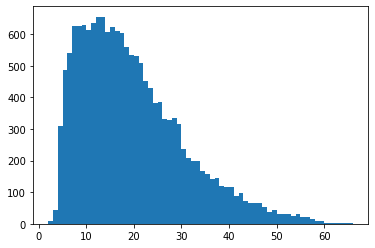

In [19]:
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [20]:
max_length = 50

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [22]:
def get_seq(tokenizer, tweets):
    seq = tokenizer.texts_to_sequences(tweets)
    padded = pad_sequences(seq, truncating = 'post', padding = 'post', maxlen = max_length)
    return padded

In [23]:
padded_train = get_seq(tokenizer, tweets)

In [24]:
padded_train[1]

array([   2,   40,  101,   60,    8,   15,  494,    5,   15, 3496,  553,
         32,   60,   61,  128,  148,   76, 1480,    4,   22, 1255,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [25]:
tweets[1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [26]:
tokenizer.texts_to_sequences([tweets[1]])

[[2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255]]

In [27]:
# Preparing Labels

In [28]:
classes = set(labels)

In [29]:
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

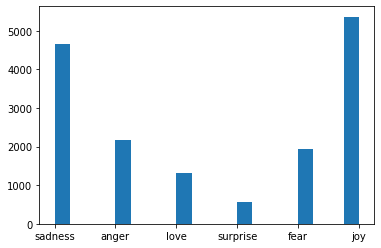

In [30]:
plt.hist(labels, bins = 20)
plt.show()

In [31]:
#creating dictionaries
class_to_index = dict((c, i) for (i, c) in enumerate(classes))

In [32]:
class_to_index

{'fear': 0, 'sadness': 1, 'joy': 2, 'anger': 3, 'surprise': 4, 'love': 5}

In [33]:
index_to_class = dict((c, i) for (c, i) in enumerate(classes))

In [34]:
index_to_class

{0: 'fear', 1: 'sadness', 2: 'joy', 3: 'anger', 4: 'surprise', 5: 'love'}

In [35]:
names_to_id = lambda labels : np.array([class_to_index.get(x) for x in labels])

In [36]:
train_labels = names_to_id(labels)

In [37]:
print(train_labels[0])

1


In [38]:
#Creating the model

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation = 'softmax')
    
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [41]:
#Training the model

In [42]:
#Creating validation sets

In [43]:
val_tweets, val_labels = get_tweets(val)

In [44]:
val_seq = get_seq(tokenizer, val_tweets)

In [45]:
val_labels = names_to_id(val_labels)

In [46]:
h = model.fit(
    padded_train, train_labels,
    validation_data = (val_seq, val_labels),
    epochs = 20,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=2)]
)

Epoch 1/20
500/500 [==============================] - 16s 25ms/step - loss: 1.3275 - accuracy: 0.4891 - val_loss: 0.9346 - val_accuracy: 0.6695
Epoch 2/20
500/500 [==============================] - 13s 27ms/step - loss: 0.6271 - accuracy: 0.7895 - val_loss: 0.5756 - val_accuracy: 0.7960
Epoch 3/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3780 - accuracy: 0.8769 - val_loss: 0.5229 - val_accuracy: 0.8160
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2687 - accuracy: 0.9172 - val_loss: 0.5210 - val_accuracy: 0.8360
Epoch 5/20
500/500 [==============================] - 16s 31ms/step - loss: 0.2068 - accuracy: 0.9388 - val_loss: 0.4578 - val_accuracy: 0.8555
Epoch 6/20
500/500 [==============================] - 16s 31ms/step - loss: 0.1623 - accuracy: 0.9526 - val_loss: 0.4472 - val_accuracy: 0.8725
Epoch 7/20
500/500 [==============================] - 16s 31ms/step - loss: 0.1300 - accuracy: 0.9628 - val_loss: 0.4529 - val_accuracy:

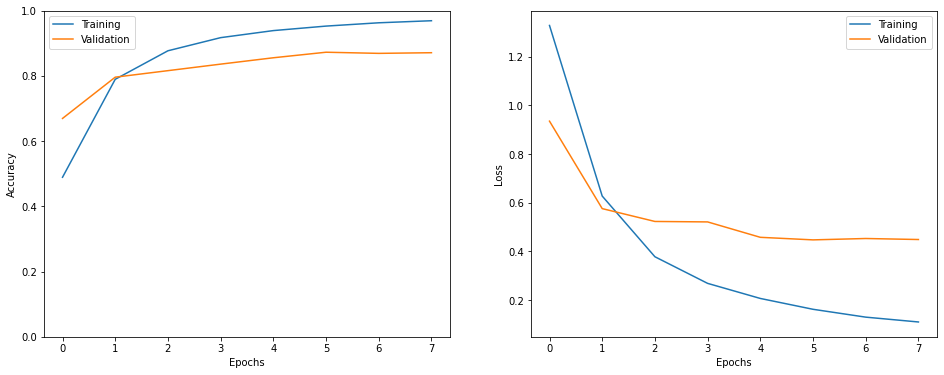

In [47]:
show_history(h)

In [48]:
#Evaluating the model

In [49]:
test_tweets, test_labels = get_tweets(test)

In [50]:
test_seq = get_seq(tokenizer, test_tweets)

In [51]:
test_labels = names_to_id(test_labels)

In [52]:
model.evaluate(test_seq, test_labels)

63/63 [==============================] - 1s 9ms/step - loss: 0.4339 - accuracy: 0.8775


[0.43390583992004395, 0.8774999976158142]

In [71]:
#Just some code to check our predictiosns on the test set
i = random.randint(0, len(test_seq)-1)

print('Tweet: ', test_tweets[i])
print('Emotion: ', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion: ', pred_class)
                   
                   

Tweet:  i feel very naughty to step outside my species but you are compellingly different
Emotion:  love
Predicted Emotion:  love


In [82]:
#Predictions on test set
preds = np.argmax(model.predict(test_seq), axis=-1)

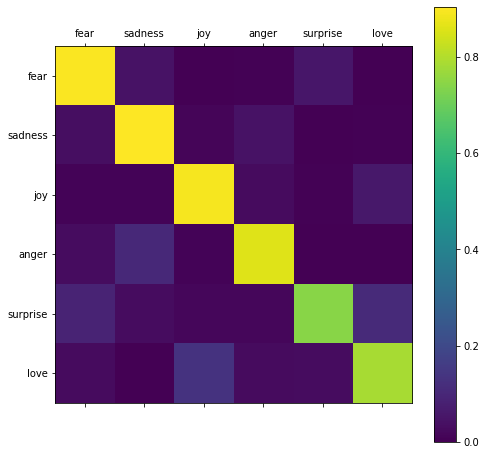

In [83]:
show_confusion_matrix(test_labels, preds, list(classes))